<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP 1: SUBE-2023** 



### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg

## Procesamiento de datos

In [5]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geopandas as gpd
import json
import plotly.express as px

In [6]:
# Leer dataset y ver las primeras filas
datos_sube_2023 = pd.read_csv("sube-2023.csv")
datos_sube_2023.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


#### **1. a)** Transformar la columna `DIA_TRANSPORTE` para que sea reconocida como una fecha.

In [7]:
sube_2023=datos_sube_2023.rename(columns={"DIA_TRANSPORTE" : "FECHA"}) # Renombrar la columna por comodidad
sube_2023['FECHA'] = pd.to_datetime(sube_2023['FECHA']) # Aplicar el cambio del tipo de dato sobre la columna correspondiente con la librería datetime
sube_2023['FECHA'].dtype # Corroboramos por consola que se trata del tipo M8, que es otra forma de llamarle al tipo datetime64

dtype('<M8[ns]')

#### **b)** Agregar tres columnas al DataFrame:
* `FECHA_DIA`
* `FECHA_ORDINAL`
* `FECHA_MES`

In [8]:
sube_2023["DIA_TRANSPORTE"] = sube_2023["FECHA"].dt.strftime('%a').str[:3]

sube_2023["FECHA_ORDINAL"] = sube_2023["FECHA"].dt.dayofyear

sube_2023["FECHA_MES"] = sube_2023["FECHA"].dt.strftime('%m')

sube_2023.head()


,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,DIA_TRANSPORTE,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,01
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,01
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,01
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,01
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,01


#### **2.**  Crear el DataFrame `datos_amba`


In [9]:
datos_amba = sube_2023.loc[(sube_2023["AMBA"] == "SI") & (sube_2023["DATO_PRELIMINAR"]== "NO")] # Filtrar para obtener el DataFrame con las restricciones pedidas
datos_amba = datos_amba[["FECHA","DIA_TRANSPORTE","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD","TIPO_TRANSPORTE"]] # Quedarse con las columnas de interés
datos_amba = datos_amba.rename(columns={"CANTIDAD": "pasajeros","DIA_TRANSPORTE":"fecha_dia"}) # Renombrar columnas con nombres más descriptivos
datos_amba.columns = datos_amba.columns.str.lower() # Aplicar .lower() a todas las columnas para que sean iguales a las del DataFrame de salida
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,01,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,01,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,01,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,01,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


#### **3. a)** Identificar la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte



In [10]:
pasajeros_por_transporte = datos_amba.groupby("tipo_transporte")["pasajeros"].sum()

total_pasajeros = pasajeros_por_transporte.sum()

proporcion_pasajeros_por_transporte = pasajeros_por_transporte / total_pasajeros

print("Proporción de la cantidad total anual de pasajeros por tipo de transporte:")
print(proporcion_pasajeros_por_transporte)

Proporción de la cantidad total anual de pasajeros por tipo de transporte:
tipo_transporte
COLECTIVO    0.837645
SUBTE        0.068097
TREN         0.094258
Name: pasajeros, dtype: float64


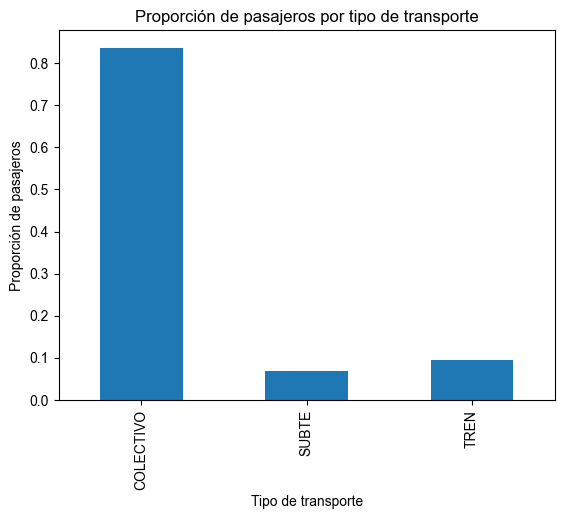

In [11]:
fig, ax = plt.subplots()

proporcion_pasajeros_por_transporte.plot(kind='bar', ax=ax)

ax.set_title('Proporción de pasajeros por tipo de transporte')
ax.set_xlabel('Tipo de transporte')
ax.set_ylabel('Proporción de pasajeros')

sns.set_style("darkgrid") 
plt.show()

**b)** Identificar la tupla `(mes, línea de subte)` donde viajó la mayor cantidad de pasajeros.

In [12]:
datos_subte = datos_amba.loc[datos_amba["tipo_transporte"] == "SUBTE",:]

pasajeros_por_mes_y_linea = datos_subte.groupby(["fecha_mes", "linea"])["pasajeros"].sum()

mayor_cantidad_pasajeros = pasajeros_por_mes_y_linea.idxmax()

print("La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es:", mayor_cantidad_pasajeros)

La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros es: ('08', 'LINEA_B')


**c)** Identificar el día hábil con menos concurrencia en el transporte público.

In [13]:
dias_habiles = datos_amba.loc[(datos_amba["fecha_dia"] != "Sun") & (datos_amba["fecha_dia"] != "Sat"),:]

pasajeros_por_dia = dias_habiles.groupby("fecha_dia")["pasajeros"].std()

dia_con_menor_concurrencia = pasajeros_por_dia.idxmin()

cantidad_de_pasajeros = dias_habiles[dias_habiles["fecha_dia"] == dia_con_menor_concurrencia]["pasajeros"].sum()

print("El dia habil con menos concurencia en el transporte publico es", dia_con_menor_concurrencia, "con", cantidad_de_pasajeros, "pasajeros")

El dia habil con menos concurencia en el transporte publico es Mon con 540161948 pasajeros


Text(0, 0.5, 'Cantidad de pasajeros')

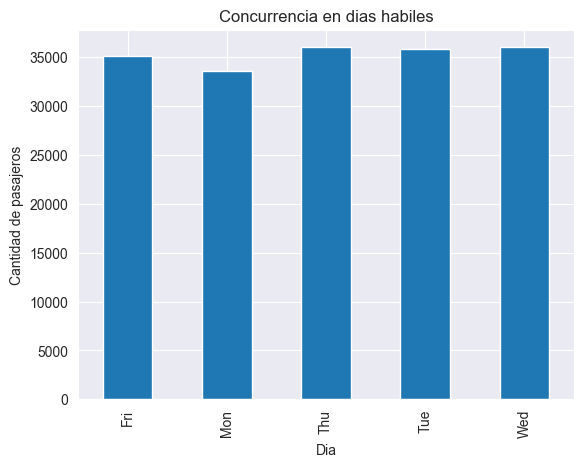

In [14]:
fig, ax = plt.subplots()

pasajeros_por_dia.plot(kind='bar', ax=ax)

ax.set_title('Concurrencia en dias habiles')
ax.set_xlabel('Dia')
ax.set_ylabel('Cantidad de pasajeros')

# Análisis Exploratorio

## **4**


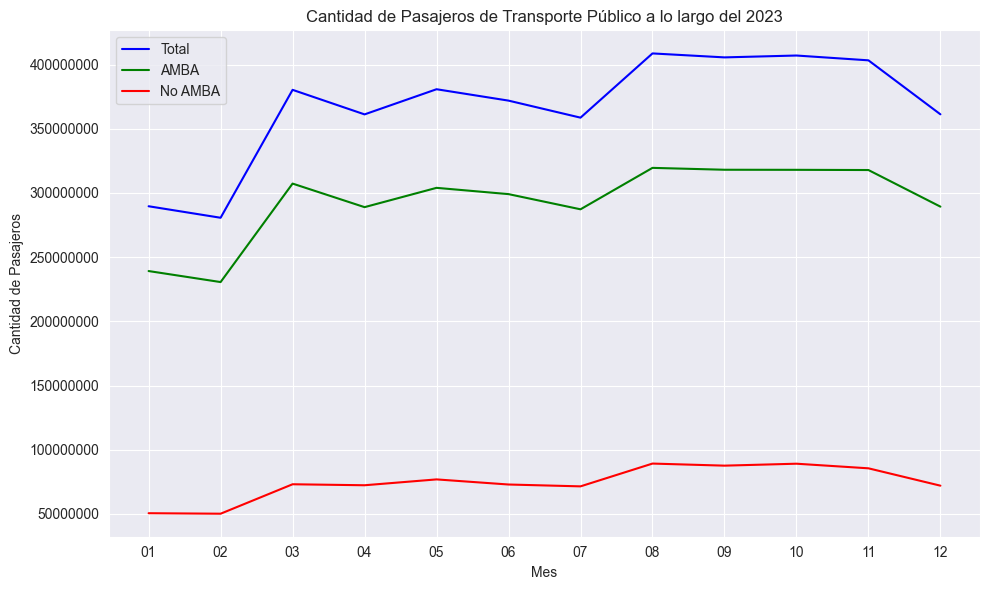

In [15]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=sube_2023.groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='Total', color='blue')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="SI"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='AMBA', color='green')

sns.lineplot(data=sube_2023[sube_2023["AMBA"]=="NO"].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', label='No AMBA', color='red')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pasajeros')
plt.legend()

plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.show()


### Informe:

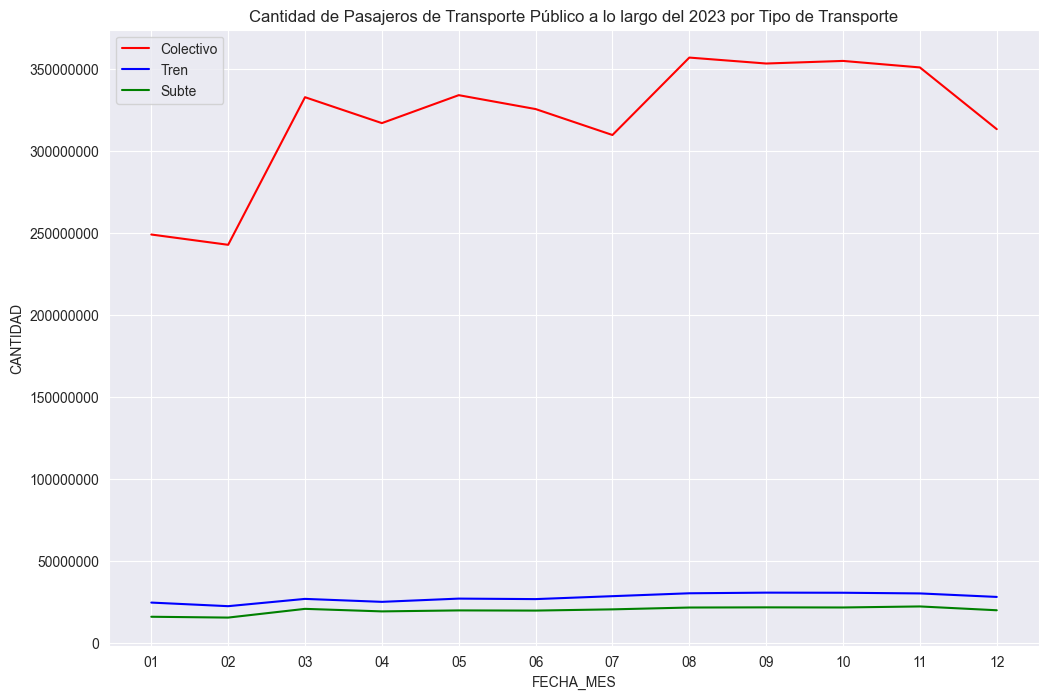

In [16]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='red', label='Colectivo')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'TREN'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='blue', label='Tren')
sns.lineplot(data=sube_2023[sube_2023['TIPO_TRANSPORTE'] == 'SUBTE'].groupby('FECHA_MES')["CANTIDAD"].sum().reset_index(), x='FECHA_MES', y='CANTIDAD', color='green', label='Subte')

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte')
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

### Informe:

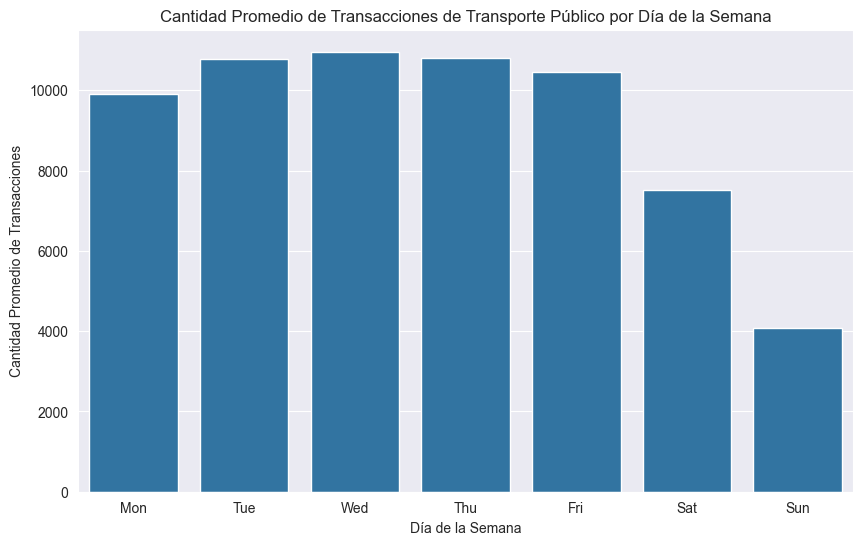

In [17]:
plt.figure(figsize=(10, 6))

sns.barplot(data=sube_2023.groupby("DIA_TRANSPORTE")["CANTIDAD"].mean().reset_index(), x='DIA_TRANSPORTE', y='CANTIDAD',order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

### Informe:

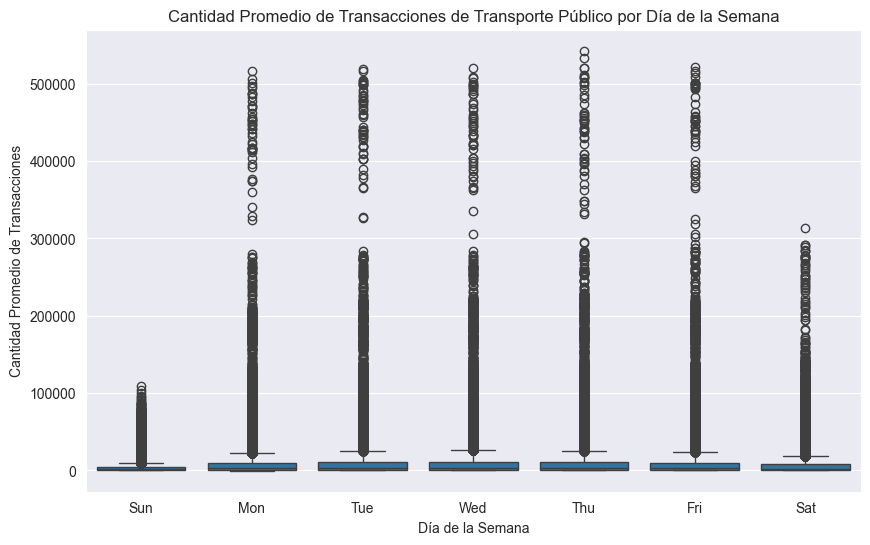

In [18]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=sube_2023, x='DIA_TRANSPORTE', y='CANTIDAD')

plt.title('Cantidad Promedio de Transacciones de Transporte Público por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Promedio de Transacciones')

plt.show()

### Informe:

C:\Users\pkoif\AppData\Local\Temp\ipykernel_13644\48242635.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




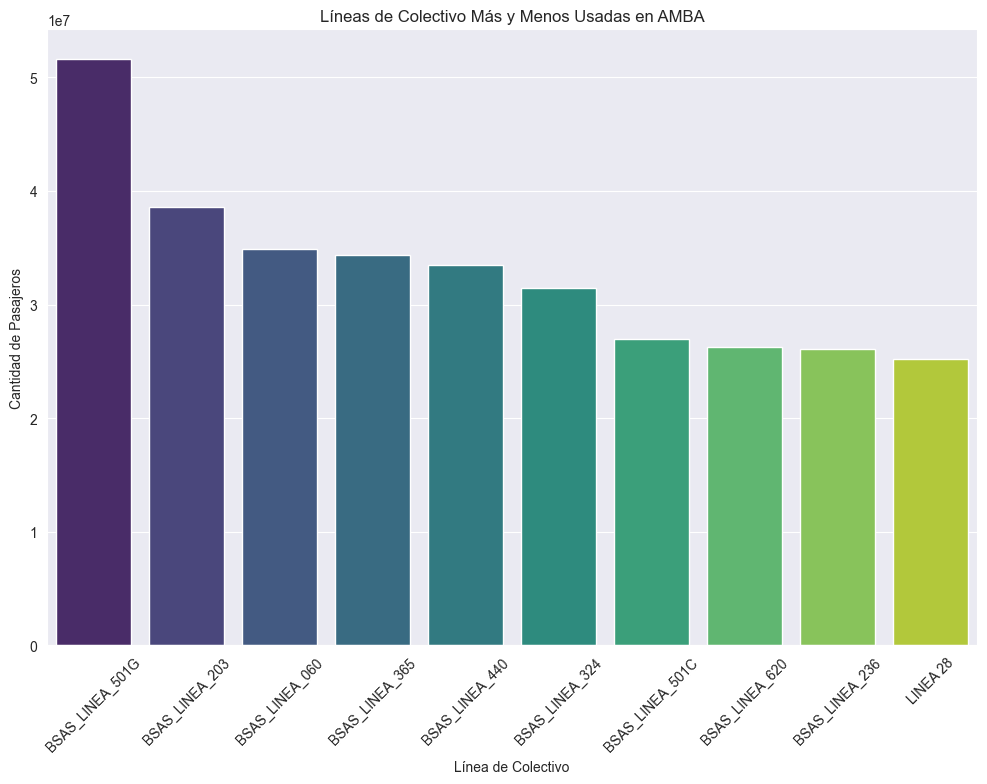

In [32]:
datos_amba = sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'SI')]


pasajeros_por_linea = datos_amba.groupby('LINEA')['CANTIDAD'].sum().reset_index()

# Identifico las líneas más usadas
top_10_lineas_mas_usadas = pasajeros_por_linea.nlargest(10, 'CANTIDAD')

lineas_usadas = top_10_lineas_mas_usadas

plt.figure(figsize=(12, 8))
sns.barplot(data=lineas_usadas, x='LINEA', y='CANTIDAD', palette='viridis')

plt.title('Líneas de Colectivo Más y Menos Usadas en AMBA')
plt.xlabel('Línea de Colectivo')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=45)
plt.show()


### Informe:

C:\Users\pkoif\AppData\Local\Temp\ipykernel_13644\735815847.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pkoif\AppData\Local\Temp\ipykernel_13644\735815847.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



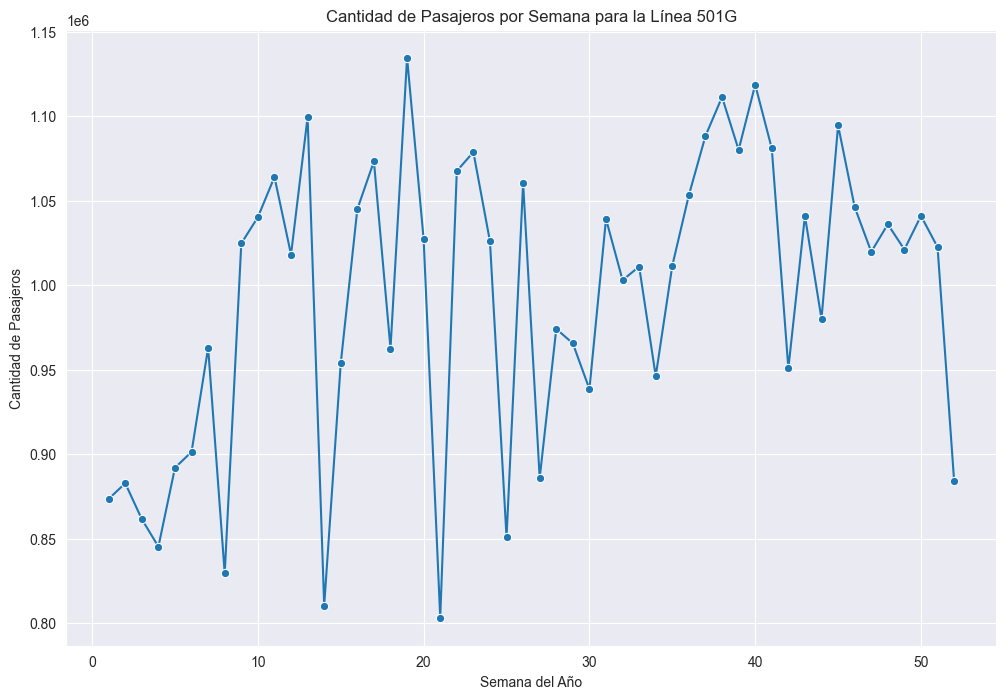

In [33]:
# Filtro los datos para la línea 501G
datos_501G = sube_2023[(sube_2023['LINEA'] == 'BSAS_LINEA_501G')]

# Convertir la columna de fechas a tipo datetime (si aún no lo está)
datos_501G['FECHA'] = pd.to_datetime(datos_501G['FECHA'])

# Agregar una columna de semana del año
datos_501G['SEMANA'] = datos_501G['FECHA'].dt.isocalendar().week

# Agrupar los datos por semana y calcular la suma de pasajeros
pasajeros_por_semana = datos_501G.groupby('SEMANA')['CANTIDAD'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=pasajeros_por_semana, x='SEMANA', y='CANTIDAD', marker='o')

plt.title('Cantidad de Pasajeros por Semana para la Línea 501G')
plt.xlabel('Semana del Año')
plt.ylabel('Cantidad de Pasajeros')
plt.grid(True)
plt.show()


### Informe:

In [29]:
plt.figure(figsize=(12, 8))

# Aplicar groupby con los filtros correspondientes
datos_agrupados = sube_2023.groupby(["FECHA_MES", "TIPO_TRANSPORTE", "AMBA"])["CANTIDAD"].sum().reset_index()

# Filtrar los datos por tipo de transporte y región y trazar los gráficos de barras
sns.set_style("")  # Cambiar el estilo del gráfico
sns.barplot(data=datos_agrupados, x='FECHA_MES', y='CANTIDAD', hue='TIPO_TRANSPORTE',
            palette='bright', alpha=0.8)  # Usar el parámetro hue para separar por tipo de transporte

plt.title('Cantidad de Pasajeros de Transporte Público a lo largo del 2023 por Tipo de Transporte y Región')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Tipo de Transporte')
plt.ticklabel_format(style='plain', axis='y')  
plt.show()



ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

<Figure size 1200x800 with 0 Axes>

### Informe:

In [20]:
with open ("./ProvinciasArgentina.geojson") as f:
    data = json.load(f)

data_mapa = sube_2023
data_mapa["PROVINCIA"]=data_mapa["PROVINCIA"].replace({
    'SANTIAGO DEL ESTERO': 'Santiago del Estero',
    'TIERRA DEL FUEGO': 'Tierra del Fuego',
    'CAPITAL FEDERAL': 'Capital Federal',
    'BUENOS AIRES': 'Buenos Aires',
    'JN': 'Jujuy',  
    'CHUBUT': 'Chubut',
    'SANTA FE': 'Santa Fe',
    'ENTRE RÍOS': 'Entre Ríos',
    'LA PAMPA': 'La Pampa',
    'MENDOZA': 'Mendoza',
    'RÍO NEGRO': 'Río Negro',
    'CHACO': 'Chaco',
    'NEUQUÉN': 'Neuquén',
    'FORMOSA': 'Formosa',
    'CORRIENTES': 'Corrientes',
    'CATAMARCA': 'Catamarca',
    'SAN JUAN': 'San Juan',
    'SAN LUIS': 'San Luis',
    'CORDOBA': 'Córdoba',
    'SANTA CRUZ': 'Santa Cruz'
})

fig = px.choropleth_mapbox(data_mapa.groupby(['PROVINCIA'])['CANTIDAD'].sum().reset_index(), geojson=data,featureidkey='properties.nombre', locations='PROVINCIA', color='CANTIDAD',
                           color_continuous_scale="Viridis",
                           range_color=(10000000, 2000000000),
                           mapbox_style= "open-street-map" , # formatos de diseño del mapa : "carto-positron", "carto-positron",   "white-bg",
                           zoom=3, center = {"lat": -38.40, "lon": -63.60},
                           opacity=0.3,
                           labels={'promedio acessos por cada 100 hogares':'acceso a internet'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: './ProvinciasArgentina.geojson'

### Informe:

In [35]:
datos_filtrados = sube_2023[(sube_2023['TIPO_TRANSPORTE'] == 'COLECTIVO') & (sube_2023['AMBA'] == 'NO') & (sube_2023['PROVINCIA'] != 'BUENOS AIRES')]

# Agrupar por provincia y calcular la suma de pasajeros
pasajeros_por_provincia = datos_filtrados.groupby('PROVINCIA')['CANTIDAD'].sum().reset_index()

# Crear el gráfico de torta interactivo
fig = px.pie(pasajeros_por_provincia, values='CANTIDAD', names='PROVINCIA',
             title='Proporción de Pasajeros por Provincia (Colectivos fuera de AMBA y Buenos Aires)',
             labels={'CANTIDAD': 'Cantidad de Pasajeros'})

# Mostrar el gráfico
fig.show()
print(pasajeros_por_provincia)

              PROVINCIA   CANTIDAD
0             CATAMARCA   19405862
1                 CHACO   30895035
2                CHUBUT   21973807
3               CORDOBA      36031
4            CORRIENTES   28895819
5            ENTRE RÍOS   34751011
6               FORMOSA   10227663
7                    JN   18505312
8                 JUJUY   68183741
9              LA PAMPA    3218221
10              MENDOZA  218523548
11              NEUQUÉN   26149637
12            RÍO NEGRO   18316783
13             SAN JUAN   96031987
14             SAN LUIS   16380758
15           SANTA CRUZ    2122996
16             SANTA FE  130693902
17  SANTIAGO DEL ESTERO     117939
18     TIERRA DEL FUEGO    8868719


### Informe:

# MODELADO

## 5

#### **5. a)** Generar un DataFrame en el que las columnas sean las líneas de colectivo de AMBA de jurisdicción nacional y las observaciones sean los días del año.

In [36]:
datos_AMBA = pd.read_csv('sube-2023-regresion.csv')

In [37]:
datos_ColectivoJN = datos_AMBA[(datos_AMBA["TIPO_TRANSPORTE"] == "COLECTIVO") & (datos_AMBA['AMBA'] == 'SI') & (datos_AMBA["PROVINCIA"] == "JN") & (datos_AMBA['DATO_PRELIMINAR'] == 'NO')] # filtro y excluyo los datos

cols = datos_ColectivoJN["LINEA"].unique() #busco toda las lineas (sin repetidos)

pasajeros_por_linea = pd.DataFrame()#creo el data frame

pasajeros_por_linea = pd. DataFrame ()
for col in cols:
    datos_linea = datos_ColectivoJN [ datos_ColectivoJN .LINEA == col ][["DIA_TRANSPORTE", "CANTIDAD"]]
    datos_linea = datos_linea . set_index ("DIA_TRANSPORTE").rename(columns = {"CANTIDAD" : col })
    pasajeros_por_linea = pd.concat ([ pasajeros_por_linea , datos_linea ], axis = 1)

print(pasajeros_por_linea.head())



                BS_ASLINEA_123  BSAS_LINEA_002  BSAS_LINEA_009  \
DIA_TRANSPORTE                                                   
2023-01-01                1681            5670            5644   
2023-01-02                9440           21759           23284   
2023-01-04               10540           24755           25405   
2023-01-05               10408           25772           26489   
2023-01-06               10530           26021           26458   

                BSAS_LINEA_010  BSAS_LINEA_015  BSAS_LINEA_017  \
DIA_TRANSPORTE                                                   
2023-01-01                5177            9109            7013   
2023-01-02               21176           45269           29962   
2023-01-04               23806           52873           33659   
2023-01-05               24688           53436           35182   
2023-01-06               24167           53163           35212   

                BSAS_LINEA_019  BSAS_LINEA_020  BSAS_LINEA_021  \
DIA_TRAN

#### **5. b)** Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes.

In [38]:
pasajeros_por_linea_2023 = pasajeros_por_linea.dropna(axis=1, how = 'any')
pasajeros_por_linea_2023.head()

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 4,LINEA 42,LINEA 44,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,17836,21609,23595,18448,12193,13949,19860,26294,11981,21784
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,18044,21993,23687,18481,12888,14668,21235,27216,11787,22972
2023-01-06,10530,26021,26458,24167,53163,35212,16459,12955,63528,16846,...,18122,22421,23731,19300,12703,14199,23472,27073,11567,23411


In [39]:
#chequeamos:
valores_faltantes = pasajeros_por_linea_2023.isnull().sum() 
print("Número de valores faltantes en cada columna:")
print(valores_faltantes)

Número de valores faltantes en cada columna:
BS_ASLINEA_123    0
BSAS_LINEA_002    0
BSAS_LINEA_009    0
BSAS_LINEA_010    0
BSAS_LINEA_015    0
                 ..
LINEA 7           0
LINEA 76          0
LINEA 8           0
LINEA_099         0
LINEA_164_AMBA    0
Length: 124, dtype: int64
